In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import xlrd

In [2]:
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
local_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
traffic_data=(r'..\data\traffic_KP.xlsx')
df_satelit= pd.read_csv(satelit_data,index_col = 0)
df_local = pd.read_csv(local_data,index_col = 0)
df_local.index = pd.to_datetime(df_local.index)
df_satelit.index = pd.to_datetime(df_satelit.index)
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='Sheet1', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data_containsNA_KP', index_col=0)
df_ulice_podaci.index = pd.to_datetime(df_ulice_podaci.index)
df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']

In [3]:
df_local.columns

Index(['D_NO2', 'D_PM10K', 'N_NO2', 'N_O3', 'N_PM10K', 'O_NO2', 'O_PM10K',
       'S_NO2', 'S_O3', 'S_PM10K', 'W_NO2', 'W_PM10K', 'year', 'dayofyear',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'N_Ox', 'S_Ox', 'holiday',
       'holiday_school', 'DonBosco_RH', 'DonBosco_Temp', 'Nord_Precip',
       'Nord_Pressure', 'Nord_RH', 'Nord_Temp', 'Nord_Winddirection',
       'Nord_Windspeed', 'Sud_RH', 'Sud_Temp', 'Sud_Winddirection',
       'Sud_Windspeed', 'West_RH', 'West_Temp', 'West_Winddirection',
       'West_Windspeed', 'Ost_Pressure', 'Ost_RH', 'Ost_Temp',
       'Ost_Winddirection', 'Ost_Windspeed'],
      dtype='object')

In [32]:
print(df_ulice_podaci.isnull().sum())

# popunjavnaje nan vrijednosti s mean za svaku kolonu

df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())
df_local = df_local.fillna(df_local.mean())
print(df_ulice_podaci.isnull().sum())
print(df_local.isnull().sum()) 
print(df_satelit.isnull().sum())

8010_208      2
8020_110      2
8020_119      3
8020_122      2
8053_111      2
8010_205      2
8010_209      2
8010_213      2
8010_214      2
8020_102      5
8020_103      2
8020_107     45
8041_218      2
8041_221      2
8045_203    155
8051_101      2
dtype: int64
8010_208    0
8020_110    0
8020_119    0
8020_122    0
8053_111    0
8010_205    0
8010_209    0
8010_213    0
8010_214    0
8020_102    0
8020_103    0
8020_107    0
8041_218    0
8041_221    0
8045_203    0
8051_101    0
dtype: int64
D_NO2                0
D_PM10K              0
N_NO2                0
N_O3                 0
N_PM10K              0
                    ..
Ost_Pressure         0
Ost_RH               0
Ost_Temp             0
Ost_Winddirection    0
Ost_Windspeed        0
Length: 62, dtype: int64
Cloud_Cover_Mean                     0
Temperature_Air_2m_Max_Day_Time      0
Temperature_Air_2m_Min_Night_Time    0
Wind_Speed_10m_Mean                  0
dtype: int64


In [33]:
Postaje=df_ulice.Reference_station
Udaljenost = df_ulice['Distance to ref']

In [34]:
Nord= []
DonBosco=[]
Sud= []
West= []
Ost= []
Postaje=df_ulice.Reference_station
mjerne_tocke = ['Nord','DonBosco','Sud','West','Ost']
for value,index,udaljenost in zip(Postaje,Postaje.index,Udaljenost):
    if value == 'Nord':
        Nord.append(index)
    if value == 'DonBosco':
        DonBosco.append(index)
    if value == 'Sud':
        Sud.append(index)
    if value == 'West':
        West.append(index)
    if value == 'Ost':
        Ost.append(index)
        
dictonary = {'Nord':Nord,'DonBosco':DonBosco,'Sud':Sud,'West':West,'Ost':Ost}

In [45]:
dictonary

{'Nord': ['8010_205', '8020_102', '8045_203', '8051_101'],
 'DonBosco': ['8020_110', '8020_119', '8020_122', '8053_111'],
 'Sud': ['8020_107', '8041_218'],
 'West': ['8020_103'],
 'Ost': ['8010_208', '8010_209', '8010_213', '8010_214', '8041_221']}

In [35]:
postaje = ['Nord','DonBosco','Sud','West','Ost']

In [36]:
N_NO2=['N_NO2','D_NO2','S_NO2','W_NO2','O_NO2']

In [37]:
temporals = ['year', 'dayofyear', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer',
       'season_winter','holiday', 'holiday_school' ]
data_temporals = df_local[temporals]

N_NO2
R-squared scores: 0.53


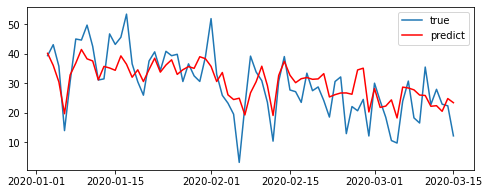

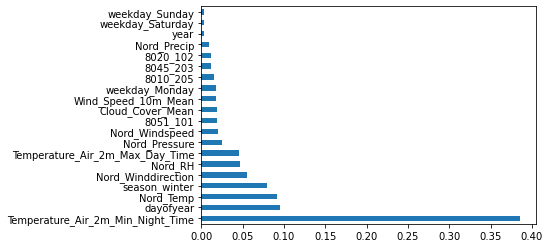

D_NO2
R-squared scores: 0.11


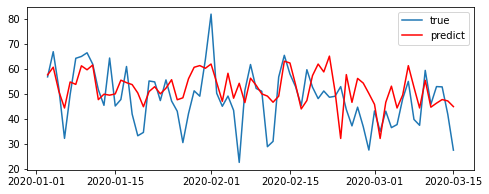

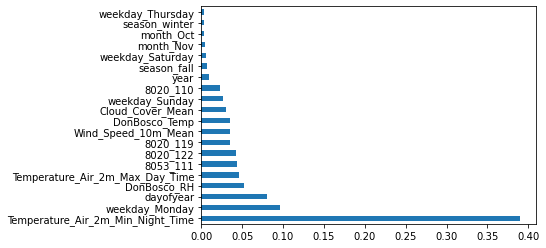

S_NO2
R-squared scores: 0.56


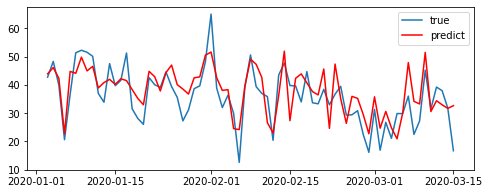

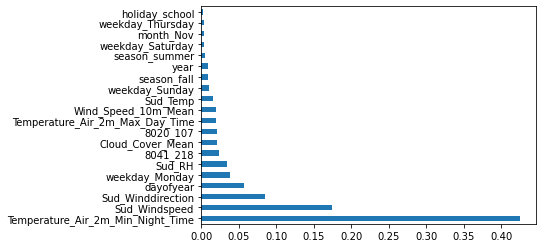

W_NO2
R-squared scores: 0.68


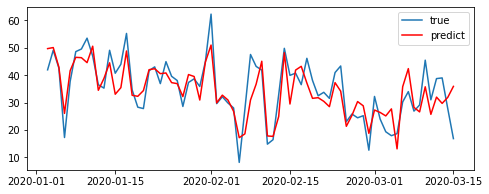

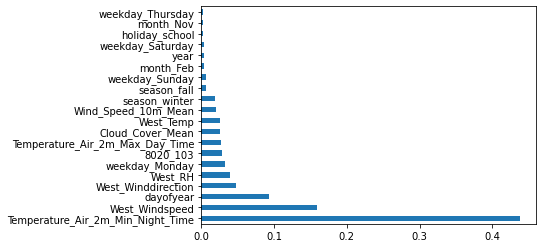

O_NO2
R-squared scores: 0.3


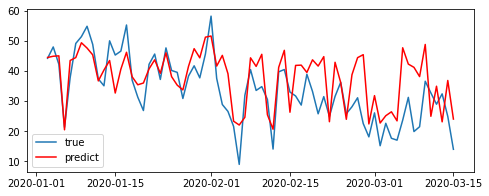

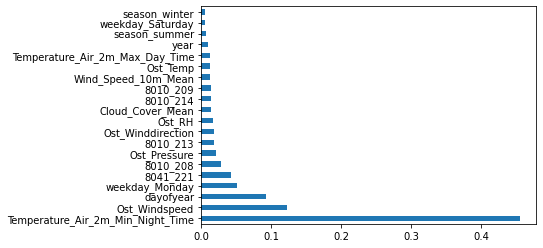

In [58]:
for value,postaja,NO2 in zip(dictonary.values(),postaje,N_NO2):
    df_ulica_sve=df_ulice_podaci[value]
    data_1 = pd.concat([df_ulica_sve, df_satelit],axis = 1, join='inner')
    df = df_local.filter(regex=postaja)
    data_2 =  pd.concat([data_1, df],axis = 1, join='inner')
    data =  pd.concat([data_2, data_temporals],axis = 1, join='inner')
    Y = df_local[NO2]
    X = data
    X_train = X['2018-01-01':'2019-12-31']
    X_test = X['2020-01-03':'2020-03-15']
    Y_train = Y['2018-01-01':'2019-12-31']
    Y_test = Y['2020-01-03':'2020-03-15']
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    print(NO2)
    print('R-squared scores:', round(r2, 2))        
    Y_pred = pd.Series(predictions, index= Y_test.index)
    plt.figure(figsize=(8, 3))
    plt.plot(Y_test)
    plt.plot(Y_pred, 'r')
    plt.legend(['true', 'predict'])
    plt.show()
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()
    

In [42]:
N_PM10=['N_PM10K','D_PM10K','S_PM10K','W_PM10K','O_PM10K']

Index(['8010_205', '8020_102', '8045_203', '8051_101', 'Cloud_Cover_Mean',
       'Temperature_Air_2m_Max_Day_Time', 'Temperature_Air_2m_Min_Night_Time',
       'Wind_Speed_10m_Mean', 'Nord_Precip', 'Nord_Pressure', 'Nord_RH',
       'Nord_Temp', 'Nord_Winddirection', 'Nord_Windspeed', 'year',
       'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday', 'holiday_school'],
      dtype='object')
N_PM10K
R-squared scores: 0.56


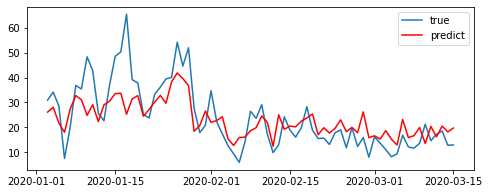

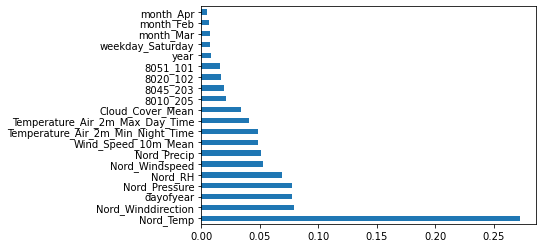

Index(['8020_110', '8020_119', '8020_122', '8053_111', 'Cloud_Cover_Mean',
       'Temperature_Air_2m_Max_Day_Time', 'Temperature_Air_2m_Min_Night_Time',
       'Wind_Speed_10m_Mean', 'DonBosco_RH', 'DonBosco_Temp', 'year',
       'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday', 'holiday_school'],
      dtype='object')
D_PM10K
R-squared scores: 0.32


<Figure size 432x288 with 0 Axes>

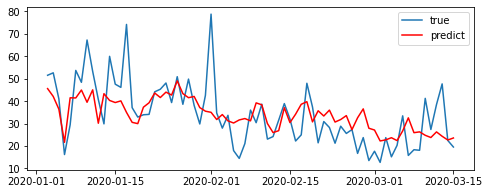

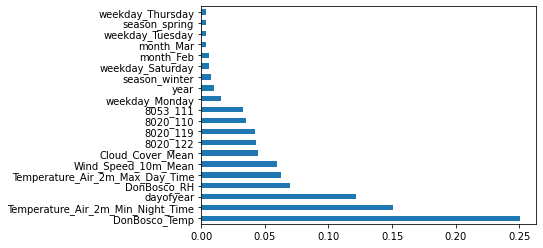

Index(['8020_107', '8041_218', 'Cloud_Cover_Mean',
       'Temperature_Air_2m_Max_Day_Time', 'Temperature_Air_2m_Min_Night_Time',
       'Wind_Speed_10m_Mean', 'Sud_RH', 'Sud_Temp', 'Sud_Winddirection',
       'Sud_Windspeed', 'year', 'dayofyear', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'holiday', 'holiday_school'],
      dtype='object')
S_PM10K
R-squared scores: 0.57


<Figure size 432x288 with 0 Axes>

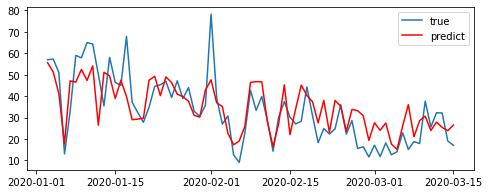

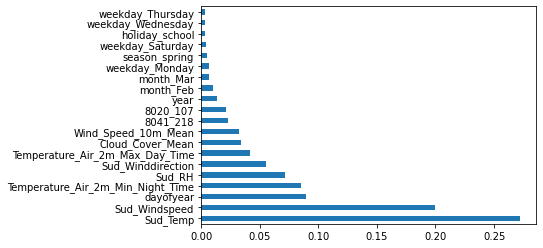

Index(['8020_103', 'Cloud_Cover_Mean', 'Temperature_Air_2m_Max_Day_Time',
       'Temperature_Air_2m_Min_Night_Time', 'Wind_Speed_10m_Mean', 'West_RH',
       'West_Temp', 'West_Winddirection', 'West_Windspeed', 'year',
       'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday', 'holiday_school'],
      dtype='object')
W_PM10K
R-squared scores: 0.56


<Figure size 432x288 with 0 Axes>

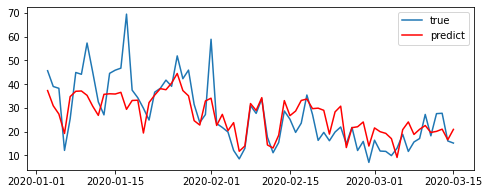

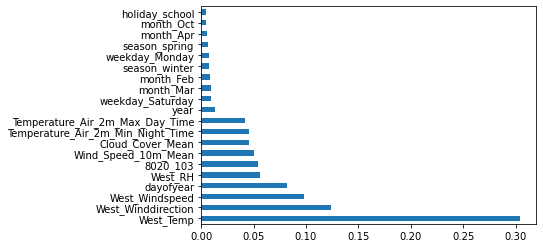

Index(['8010_208', '8010_209', '8010_213', '8010_214', '8041_221',
       'Cloud_Cover_Mean', 'Temperature_Air_2m_Max_Day_Time',
       'Temperature_Air_2m_Min_Night_Time', 'Wind_Speed_10m_Mean',
       'Ost_Pressure', 'Ost_RH', 'Ost_Temp', 'Ost_Winddirection',
       'Ost_Windspeed', 'year', 'dayofyear', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'holiday', 'holiday_school'],
      dtype='object')
O_PM10K
R-squared scores: 0.26


<Figure size 432x288 with 0 Axes>

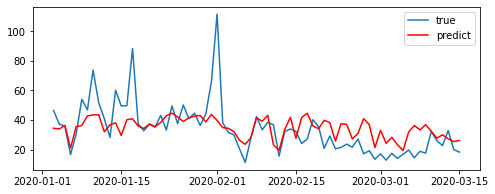

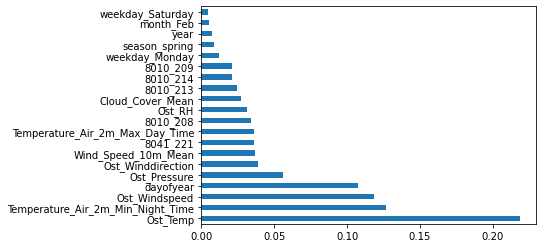

<Figure size 432x288 with 0 Axes>

In [57]:
for value,postaja,PM10 in zip(dictonary.values(),postaje,N_PM10):
    df_ulica_sve=df_ulice_podaci[value]
    data_1 = pd.concat([df_ulica_sve, df_satelit],axis = 1, join='inner')
    df = df_local.filter(regex=postaja)
    data_2 =  pd.concat([data_1, df],axis = 1, join='inner')
    data =  pd.concat([data_2, data_temporals],axis = 1, join='inner')
    print(data.columns)
    Y = df_local[PM10]
    X = data
    X_train = X['2018-01-01':'2019-12-31']
    X_test = X['2020-01-03':'2020-03-15']
    Y_train = Y['2018-01-01':'2019-12-31']
    Y_test = Y['2020-01-03':'2020-03-15']
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    print(PM10)
    print('R-squared scores:', round(r2, 2))        
    Y_pred = pd.Series(predictions, index= Y_test.index)
    plt.figure(figsize=(8, 3))
    plt.plot(Y_test)
    plt.plot(Y_pred, 'r')
    plt.legend(['true', 'predict'])
    plt.show()
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()
    plt.savefig(f'Rezultati_modela  {PM10}.jpg')